Output grid saved as output_grid.png


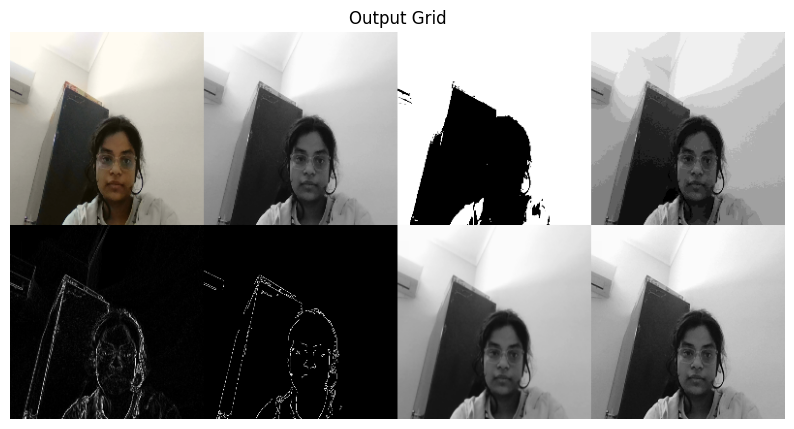

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to show images in a grid and return the combined image
def combine_images_grid(images, titles, grid_size=(2, 4), image_size=(200, 200)):
    n, m = grid_size
    height, width = image_size

    # Create a blank canvas to fit all images
    combined_image = np.zeros((n * height, m * width, 3), dtype=np.uint8)

    for idx, (img, title) in enumerate(zip(images, titles)):
        row, col = divmod(idx, m)

        # Resize the image to fit the grid
        img_resized = cv2.resize(img, (width, height))

        # Convert grayscale images to 3 channels for consistency
        if len(img_resized.shape) == 2:
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_GRAY2BGR)

        # Place the image on the grid
        combined_image[row * height:(row + 1) * height, col * width:(col + 1) * width] = img_resized

    return combined_image

# Capture an image from the webcam
def capture_image():
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam
    ret, frame = cap.read()
    cap.release()
    if ret:
        return frame
    else:
        print("Error: Unable to capture image.")
        return None

# Convert to grayscale
def grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold image to black and white
def threshold_bw(img):
    _, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return bw

# Threshold image to 16 levels of gray
def threshold_16_levels(img):
    levels = np.floor(img / 16) * 16
    return np.uint8(levels)

# Sobel and Canny Edge Detectors
def sobel_canny(img):
    sobel = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    canny = cv2.Canny(img, 100, 200)
    return np.abs(sobel), canny

# Gaussian Filter
def gaussian_filter(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

# Sharpen Image
def sharpen(img):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    return cv2.filter2D(img, -1, kernel)

# Main function
def main():
    # Step 1: Capture an image
    img = capture_image()
    if img is None:
        return

    gray = grayscale(img)

    # Step 2: Process the image with various techniques
    bw = threshold_bw(gray)
    levels_16 = threshold_16_levels(gray)
    sobel, canny = sobel_canny(gray)
    blurred = gaussian_filter(gray)
    sharpened = sharpen(blurred)

    # Prepare images and titles
    images = [
        img, gray, bw, levels_16,
        np.uint8(sobel), canny, blurred, sharpened
    ]
    titles = [
        "Original", "Grayscale", "Black & White", "16 Levels",
        "Sobel Edge", "Canny Edge", "Gaussian Blur", "Sharpened"
    ]

    # Combine images into a grid
    combined_image = combine_images_grid(images, titles)

    # Save the grid as a file
    output_filename = "output_grid.png"
    cv2.imwrite(output_filename, combined_image)
    print(f"Output grid saved as {output_filename}")

    # Display the output grid using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(cv2.cvtColor(combined_image, cv2.COLOR_BGR2RGB))
    plt.title("Output Grid")
    plt.axis('off')
    plt.show()

if __name__ == "__main__":
    main()


